In [19]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [20]:
x = housing.data
y = housing.target

df = pd.DataFrame(x, columns = housing.feature_names)
df['target'] = y

df.sample(10)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
8053   2.2500      24.0  4.498168   1.172161       537.0  1.967033     33.84   
6633   4.1518      43.0  6.105263   1.081340       545.0  2.607656     34.16   
8899   3.1563      29.0  3.416141   1.007566      1238.0  1.561160     34.02   
12711  2.5363      25.0  4.632017   1.110187      1130.0  2.349272     38.59   
17195  4.1375      26.0  5.789644   1.095469      1504.0  2.433657     34.45   
15923  3.6719      48.0  5.485106   1.191489       782.0  3.327660     37.72   
16571  4.8021      45.0  5.927536   1.043478       340.0  2.463768     37.74   
625    3.2440      38.0  4.494949   1.010101       481.0  2.429293     37.71   
10307  7.5744      25.0  6.932927   1.036585       524.0  3.195122     33.90   
9837   2.9309      29.0  4.495389   1.089592      1574.0  2.073781     36.61   

       Longitude  target  
8053     -118.19   1.920  
6633     -118.16   2.307  
8899     -118.49   3.300  
12711    -121.40   1.246  
17195    -119.75   3.950  
15923    -122.43   2.598  
16571    -121.42   1.335  
625      -122.17   1.798  
10307    -117.82   2.593  
9837     -121.90   2.171

Preprocess

In [21]:
df.isna().any()

MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
target        False
dtype: bool

In [22]:
df.shape

(20640, 9)

In [23]:
df.drop_duplicates()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

    
Outliers

In [24]:
import pandas as pd

def detect_outliers_iqr(df, columns=None):
    """
    Identifies outliers in a DataFrame using the Interquartile Range (IQR) method.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - columns (list, optional): List of column names to check for outliers. If None, all numerical columns are used.
    
    Returns:
    - pd.DataFrame: A DataFrame indicating which values are outliers (True/False).
    """
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns  # Auto-select numerical columns
    
    outliers = pd.DataFrame(index=df.index)  # Create a new DataFrame to store outlier flags

    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR  # Lower threshold
        upper_bound = Q3 + 1.5 * IQR  # Upper threshold
        
        # Flag values outside the IQR range as outliers (True = Outlier)
        outliers[col] = (df[col] < lower_bound) | (df[col] > upper_bound)

    return outliers


In [25]:
outliers = detect_outliers_iqr(df)
print(outliers)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0        True     False     False      False       False     False     False   
1        True     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False       True       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       Longitude  target  
0          F

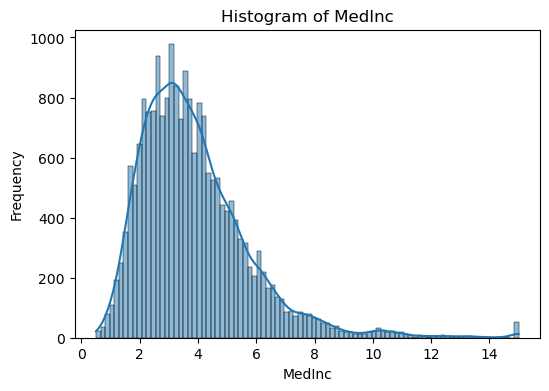

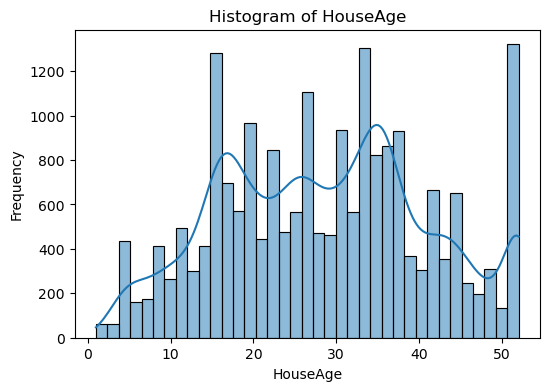

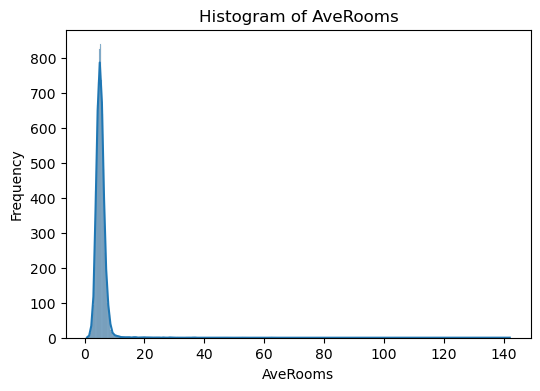

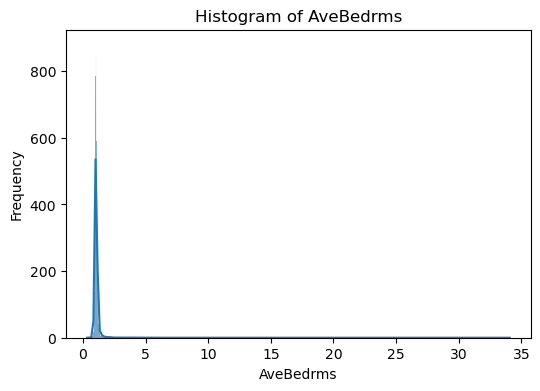

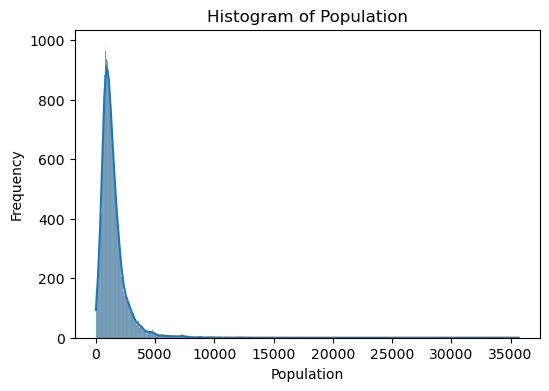

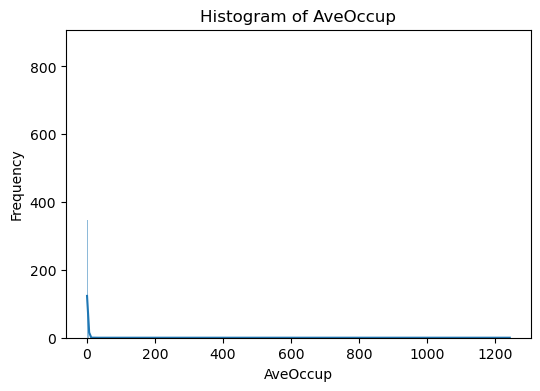

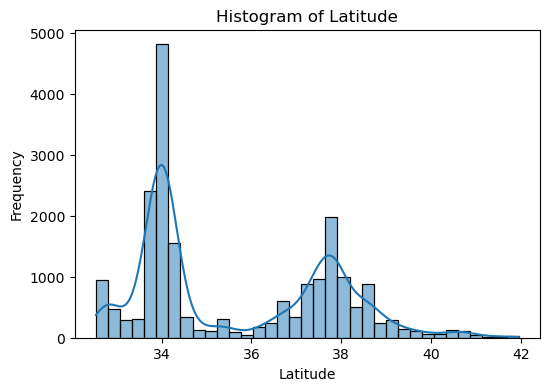

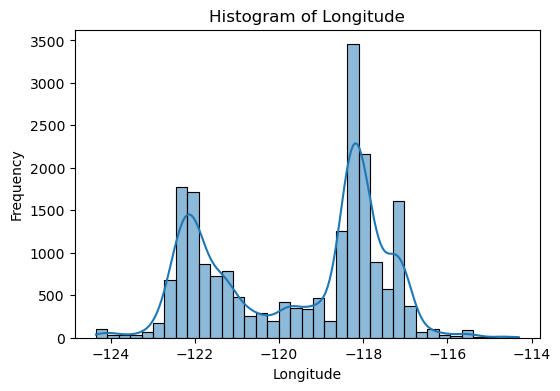

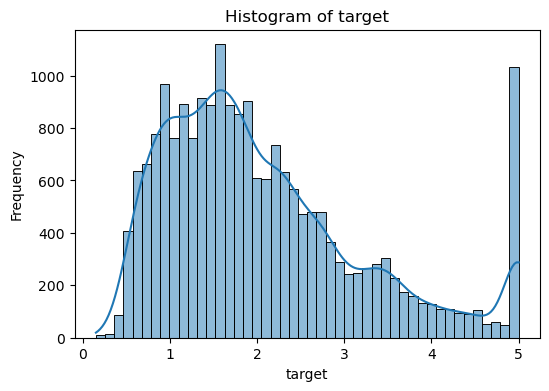

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through each numerical column and plot its histogram
for col in df.select_dtypes(include=['number']).columns:  # Select only numeric columns
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    sns.histplot(df[col], kde=True)  # Histogram with Kernel Density Estimation (KDE)
    plt.title(f"Histogram of {col}")  # Add title
    plt.xlabel(col)  # Label x-axis
    plt.ylabel("Frequency")  # Label y-axis
    plt.show()  # Display the plot


In [27]:
df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  target  
0        -122.23   4.526  
1        -122.22   3.585  
2        -122.24   3.521  
3        -122.25   3.413  
4        -122.25   3.422  
...          ...     ...  
20635    -121.09   0.781  
20636    -121.21   0.771  
20637    -121.22   0.923  
20638    -121.32   0.847  
20639    -121.24   0.894  

[20640 rows x 9 columns]

In [48]:
from sklearn.model_selection import train_test_split
import sklearn.preprocessing
import sklearn.model_selection
from sklearn.pipeline import Pipeline
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(x, y)



In [54]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def location_to_grid(X, lat_min, lon_min, grid_size):
    """
    Converts latitude & longitude into a single Grid ID for each row.
    
    Parameters:
    - X (numpy array): 2D array with shape (n_samples, 2) where:
        - column 0 = Latitude
        - column 1 = Longitude
    - lat_min (float): Minimum latitude value
    - lon_min (float): Minimum longitude value
    - grid_size (float): Size of each grid cell in degrees
    
    Returns:
    - numpy array: 1D array of grid IDs
    """
    lat = X[:, 0]  # Extract latitude
    lon = X[:, 1]  # Extract longitude
    
    row = np.floor((lat - lat_min) / grid_size).astype(int)
    col = np.floor((lon - lon_min) / grid_size).astype(int)
    
    grid_id = (row * 1000) + col  # Generate unique Grid ID
    return grid_id.reshape(-1, 1)  # Reshape for scikit-learn compatibility

# Set reference values
latitude_min, latitude_max = df['Latitude'].min(), df['Latitude'].max()
longitude_min, longitude_max = df['Longitude'].min(), df['Longitude'].max()
grid_size = 0.05  # Grid size in degrees

# Create FunctionTransformer
location_transformer = FunctionTransformer(
    lambda X: location_to_grid(X, latitude_min, longitude_min, grid_size),
    validate=False
)
df['grid_id'] = df.apply(lambda row: location_to_grid(row['Latitude'], row['Longitude'], latitude_min, latitude_max, longitude_min, longitude_max), axis=1)
df


TypeError: location_to_grid() takes 4 positional arguments but 6 were given

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def preprocess1(X_train, X_test):
    """Pipeline that applies location transformation and StandardScaler."""
    pipe = Pipeline([
        ('location', location_transformer),  # Convert lat/lon to grid IDs
        ('scaler', StandardScaler())  # Standardize the transformed values
    ])
    
    X_train_prep = pipe.fit_transform(X_train)
    X_test_prep = pipe.transform(X_test)  # Apply same transformation
    
    return X_train_prep, X_test_prep

def preprocess2(X_train, X_test):
    """Pipeline that applies location transformation and MinMaxScaler."""
    pipe = Pipeline([
        ('location', location_transformer),  # Convert lat/lon to grid IDs
        ('scaler', MinMaxScaler())  # Min-Max scale the transformed values
    ])
    
    X_train_prep = pipe.fit_transform(X_train)
    X_test_prep = pipe.transform(X_test)  # Apply same transformation
    
    return X_train_prep, X_test_prep



X_train_prep1, X_test_prep1 = preprocess1(X_train, X_test)
X_train_prep2, X_test_prep2 = preprocess2(X_train, X_test)

180

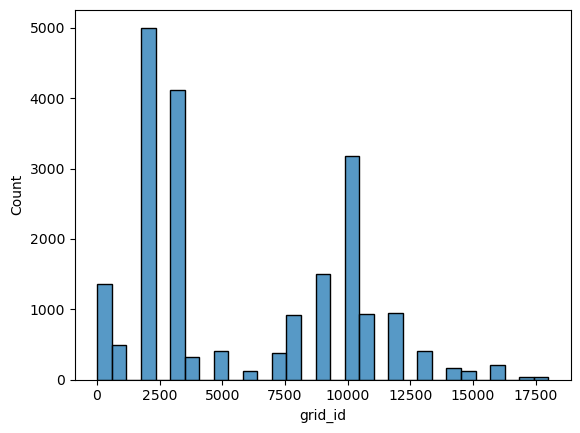

In [59]:
sns.histplot(df.grid_id)
df.grid_id.nunique()